In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
train = pd.read_csv('train_clean.csv')   # Loading cleaned train data
test = pd.read_csv('test_clean.csv')     # Loading cleaned test data

Dropping rows with null value (if any)

In [15]:
train.dropna(inplace=True)

In [16]:
test.dropna(inplace=True)

Train-Validation Split


In [17]:
import pandas as pd 
 
train_size = int(0.8 * len(train))


train_set = train.iloc[:train_size , : ]
val_set = train.iloc[train_size: , : ]

Defining X_train , X_val , y_train and y_val

In [18]:
X_train = train_set.drop(['Survived'],axis = 1)
X_val = val_set.drop(["Survived"],axis = 1)
y_train = train_set["Survived"]
y_val = val_set["Survived"]

# **Code for implementation of KNN algorithm**

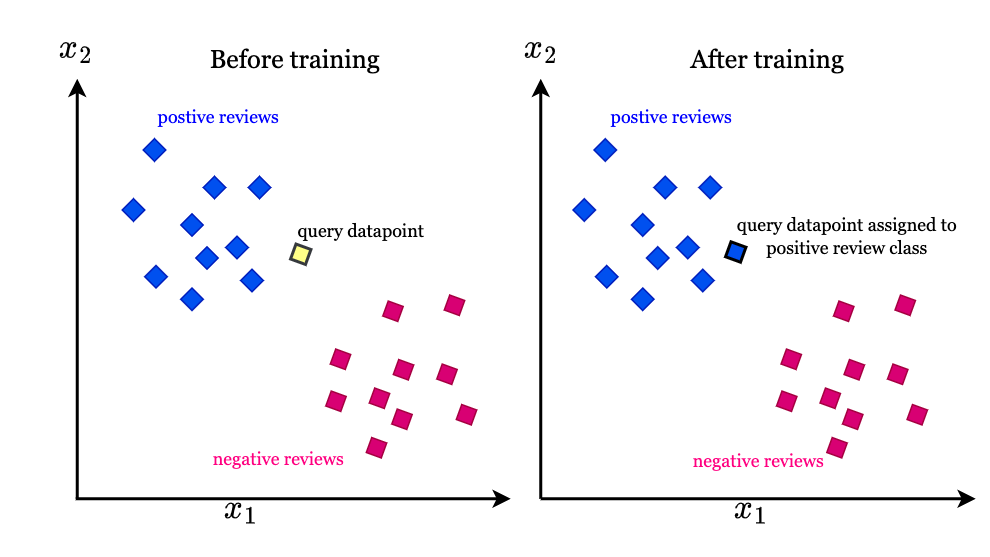

In [19]:
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

Function to calculate accuracy 

In [20]:
def accuracy(y_true,y_pred,normalize=True):
    accuracy=[]
    for i in range(len(y_pred)):
        if y_pred[i]==y_true[i]:
            accuracy.append(1)
        else:
            accuracy.append(0)
    if normalize==True:
        return np.mean(accuracy)
    if normalize==False:
        return sum(accuracy)

# **Finding the best value of K using a range of values between 1 and 80**

In [ ]:
accuracy_vals = []

for k in range(3,80) :
  y_preds_k = predict(np.array(X_train) , np.array(y_train) , np.array(X_train) , k)
  accuracy_k = accuracy(np.array(y_train) , y_preds_k)
  accuracy_vals.append(accuracy_k)

<ipython-input-19-756e36e679e8>:34: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lab = mode(labels)


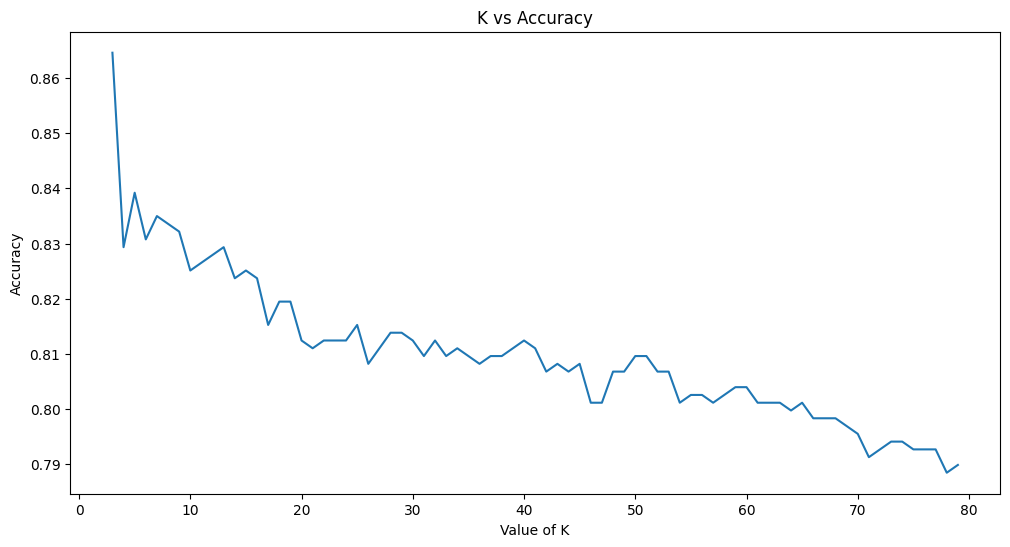

In [10]:
x_vals = np.arange(3,80)
y_vals = accuracy_vals

plt.figure(figsize = (12,6))

plt.plot(x_vals , y_vals)
plt.title("K vs Accuracy")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

plt.show()

# **From the graph of K vs Accuracy , we can infer that a value around 1-7 will give us the best accuracy**

In [11]:
y_preds_best = predict(np.array(X_train) , np.array(y_train) , np.array(X_val) , 6) 

<ipython-input-7-756e36e679e8>:34: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lab = mode(labels)


In [12]:
print("Best accuracy : {} %".format(round(accuracy(np.array(y_val) , y_preds_best )*100,2)))

Best accuracy : 86.52 %
